<a href="https://colab.research.google.com/github/Amey-Thakur/PYTHON-CRASH-COURSE/blob/main/PYTHON_CRASH_COURSE_DAY_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 9**

**Logistic Regression**

It is one of the popular ML Algorithm used in the case of predicting various categorical datasets

**Problem Statement**

Classification of Iris Flower's using Logistic Regression

In [1]:
#lets import the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from math import ceil

#plots
import matplotlib.pyplot as plt
import seaborn as sb

#algorithms
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates

#Advanced Optimization
from scipy import optimize as op

In [2]:
#lets load the dataset
iris = pd.read_csv('/content/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


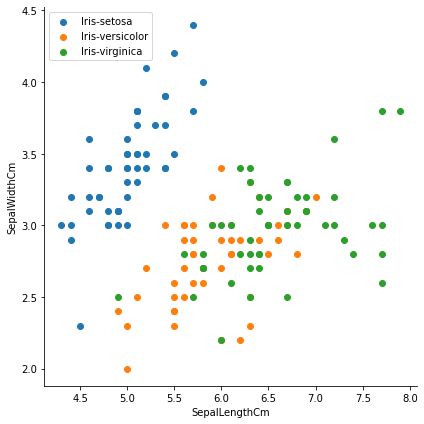

In [3]:
#lets visualize the species
#plot the species with respect to sepal length
sepalPlt = sb.FacetGrid(iris, hue='Species',size=6).map(plt.scatter, "SepalLengthCm", "SepalWidthCm")
plt.legend(loc='upper left')

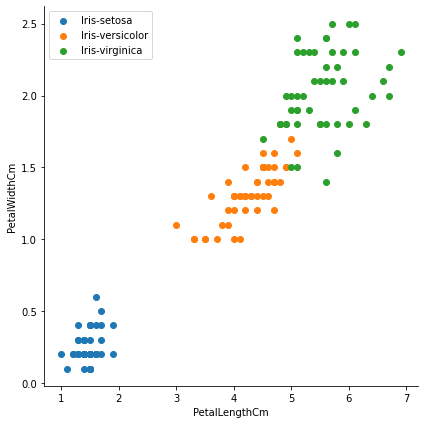

In [4]:
#plot the species with respect to petal length
petalPlt = sb.FacetGrid(iris, hue='Species',size=6).map(plt.scatter, "PetalLengthCm", "PetalWidthCm")
plt.legend(loc='upper left')

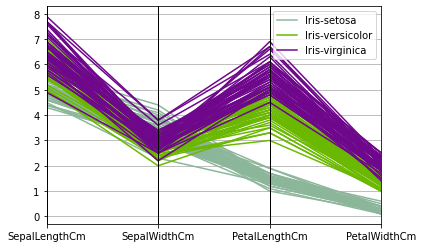

In [5]:
#let splot parallel coordinates of the petal and sepal
parallel_coordinates(iris.drop("Id", axis=1), "Species")

In [6]:
#lets setup the data for training our model
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

#number of examples
m = iris.shape[0]

#features
n = 4

#number of classes
k = 3

X = np.ones((m, n+1))
Y = np.array((m,1))

X[:,1] = iris['PetalLengthCm']
X[:,2] = iris['PetalWidthCm']
X[:,3] = iris['SepalLengthCm']
X[:,4] = iris['SepalWidthCm']

#lets provide labels
Y = iris['Species']

#mean normalization
for j in range(n):
  X[:,j] = (X[:,j] - X[:,j].mean())

#lets split dataset
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=11)

In [7]:
#Logistic Regression
def sigmoid(z):
  return 1.0/(1 + np.exp(-z))

#Regularised cost functions
def regCostFunction(theta, X, Y, _lambda = 0.1):
  m = len(Y)
  h = sigmoid(X.dot(theta))
  reg = (_lambda/(2*m) * np.sum(theta **2))

  return ((1/m) * (-Y.T.dot(np.log(h)) -(1-Y).T.dot(np.log(1-h))) + reg)

def regGradient(theta, X, Y, _lambda = 0.1):
  m,n = X.shape
  theta = theta.reshape((n,1))
  Y = Y.reshape((m,1))
  h = sigmoid(X.dot(theta))
  reg = _lambda * theta / m

  return ((1/m) * X.T.dot(h-Y)) + reg

#Optimal Theta
def logisticRegression(X,Y,theta):
  res = op.minimize(fun = regCostFunction, x0 = theta, args = (X,Y), method='TNC', jac=regGradient)

  return res.x

In [8]:
#Lets train our model
all_theta = np.zeros((k, n+1))

#one vs all
i = 0
for flower in species:
  #set the labels 0 and 1
  tmp_y = np.array(Y_train == flower, dtype= int)
  optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1, 1)))
  all_theta[i] = optTheta
  i += 1

In [9]:
#lets make predictions
P = sigmoid(X_test.dot(all_theta.T))  #probability for each flower
p = [species[np.argmax(P[i, :])] for i in range(X_test.shape[0])]


#lets print the accuracy
print("Test Accuracy : ", accuracy_score(Y_test, p) * 100, "%")

Test Accuracy :  96.66666666666667 %
